# DSC 630 Assignment 3.3
### BY Chase Lemons

###### Premise


For this week’s assignment we're going to use Dodgers Major League Baseball data from 2012. The data file you will be using is contained in the dodgers.csv file. I would like you to determine what night would be the best to run a marketing promotion to increase attendance. You will want to use TRAIN. As a reminder, the training set is the data we fit our model on. Use a combination of R and Python to accomplish this assignment. From this data, at a minimum, you should be able to demonstrate the following:

Box plots

Scatter plots

Regression Model

###### Part 2

Part 1 of the task was completed in R. We did an initial analysis to try and understand the data. Now we will attempt to create a model to try and help us determine what night would be the best to run a marketing scheme to increase attendance.

In [2]:
import pandas as pd
import numpy as np


dodgers_data_path = "http://content.bellevue.edu/cst/dsc/630/dodgers.csv"

dodgers_data = pd.read_csv(dodgers_data_path)
dodgers_night_data = dodgers_data[(dodgers_data.day_night == "Night")]



In [3]:
from sklearn.preprocessing import LabelEncoder

lb_make = LabelEncoder()

# Provide numeric day of the week
dodgers_night_data["num_day_of_week"] = lb_make.fit_transform(dodgers_night_data["day_of_week"])

# Provide numeric bobblehead
dodgers_night_data["num_bobble"] = lb_make.fit_transform(dodgers_night_data["bobblehead"])


C:\Users\c12003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  
C:\Users\c12003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  if __name__ == '__main__':


In [12]:
from sklearn.model_selection import train_test_split
import statsmodels.formula.api as smf


train_1, test_1 = train_test_split(dodgers_night_data, train_size = 0.5, test_size = 0.5, random_state=123)

results = smf.ols('attend ~ num_day_of_week', data = train_1).fit()
print(results.summary())

predictions = results.predict(test_1.num_day_of_week)

                            OLS Regression Results                            
Dep. Variable:                 attend   R-squared:                       0.247
Model:                            OLS   Adj. R-squared:                  0.223
Method:                 Least Squares   F-statistic:                     10.16
Date:                Sun, 31 Mar 2019   Prob (F-statistic):            0.00327
Time:                        16:37:31   Log-Likelihood:                -338.84
No. Observations:                  33   AIC:                             681.7
Df Residuals:                      31   BIC:                             684.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                      coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------------------
Intercept        3.777e+04   1813.618     

In [16]:
test_1["predictions"] = predictions
test_1



C:\Users\c12003\AppData\Local\Continuum\anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,month,day,attend,day_of_week,opponent,temp,skies,day_night,cap,shirt,fireworks,bobblehead,num_day_of_week,num_bobble,predictions
64,AUG,30,54621,Thursday,Snakes,80,Clear,Night,NO,NO,NO,YES,4,1,45033.509340
80,OCT,3,34014,Wednesday,Giants,82,Cloudy,Night,NO,NO,NO,NO,6,0,48667.395349
46,JUL,16,32238,Monday,Phillies,67,Clear,Night,NO,NO,NO,NO,1,0,39582.680328
37,JUN,29,49763,Friday,Mets,72,Clear,Night,NO,NO,YES,NO,0,0,37765.737324
65,AUG,31,37622,Friday,Snakes,77,Clear,Night,NO,NO,YES,NO,0,0,37765.737324
62,AUG,25,40284,Saturday,Marlins,70,Clear,Night,NO,NO,NO,NO,2,0,41399.623332
2,APR,12,28328,Thursday,Pirates,57,Cloudy,Night,NO,NO,NO,NO,4,0,45033.509340
71,SEP,13,43309,Thursday,Cardinals,80,Clear,Night,NO,NO,NO,NO,4,0,45033.509340
61,AUG,24,39805,Friday,Marlins,71,Clear,Night,NO,NO,YES,NO,0,0,37765.737324
49,JUL,30,33180,Monday,Snakes,73,Clear,Night,NO,NO,NO,NO,1,0,39582.680328


AttributeError: 'PathCollection' object has no attribute 'show'

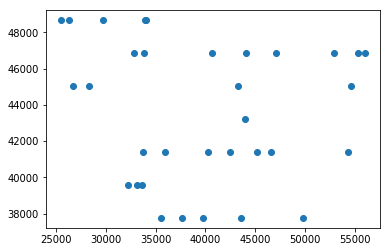

In [20]:
import matplotlib.pyplot as plt

a = plt.scatter(test_1.attend, test_1.predictions)
a.show()

In [29]:
df2 = dodgers_night_data[["day_of_week","num_day_of_week"]]
df2 = df2.drop_duplicates()

predictions2 = results.predict(df2.num_day_of_week)
df2["predictions"] = predictions2

df2.sort_values(by=['predictions'])

,day_of_week,num_day_of_week,predictions
3,Friday,0,37765.737324
6,Monday,1,39582.680328
4,Saturday,2,41399.623332
22,Sunday,3,43216.566336
2,Thursday,4,45033.509340
7,Tuesday,5,46850.452345
1,Wednesday,6,48667.395349


###### Recommendation

Based on the our model not being a good one. And the visualizations from part 1 of the data exploration and our results so far. We would suggest that Monday night needs to have a marketing scheme to increase numbers. In addition, the most effective marketing scheme looked like the bobbleheads. 